In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load the datasets
ls = pd.read_csv('F:\\Machine Learning\\dataset\\money-happy\\life satisfaction.csv')
ls.head()

,Country,Life Satisfaction
0,Non-OECD Economies,4.8
1,Greece,5.2
2,Portugal,5.2
3,Hungary,5.3
4,Turkey,5.5


In [21]:
GDP = pd.read_csv('F:\\Machine Learning\\dataset\\money-happy\\WEO_Data.csv',
                 na_values='n/a',thousands = ',')
GDP.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2017,Estimates Start After
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",17449.0,2014.0
1,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",12978.0,2012.0
2,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",173856.0,2014.0
3,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",86287.0,2014.0
4,Antigua and Barbuda,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1389.0,2014.0


In [22]:
# prepare the data
merge_two_df = pd.merge(ls,GDP,how='inner',on=['Country'])
# check if there is NULL data
merge_two_df.isnull().sum()

Country                          0
Life Satisfaction                0
Subject Descriptor               0
Units                            0
Scale                            0
Country/Series-specific Notes    0
2017                             0
Estimates Start After            0
dtype: int64

In [23]:
merge_two_df.head()

,Country,Life Satisfaction,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2017,Estimates Start After
0,Greece,5.2,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",203217.0,2015.0
1,Portugal,5.2,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",212152.0,2015.0
2,Hungary,5.3,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",120116.0,2015.0
3,Turkey,5.5,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",791239.0,2015.0
4,Estonia,5.6,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",25331.0,2015.0


In [28]:
x_gdp = np.array(merge_two_df['2017']).reshape(-1,1)
y_ls = np.array(merge_two_df['Life Satisfaction']).reshape(-1,1)
max(x_gdp)

array([19284993.])

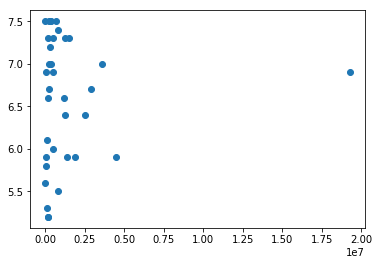

In [29]:
# visualize
plt.scatter(x_gdp,y_ls)

In [30]:
#
merge_two_df.to_csv('F:\\Machine Learning\\dataset\\money-happy\\new.csv')

In [31]:
# select a linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# train the model
lr.fit(x_gdp,y_ls)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# make a prediction for Cyprus
X_new = [[22587]] # Cyprus GDP
print(lr.predict(X_new))

[[6.57345918]]
